In [1]:
import matsim
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

### Export Network to shape File

In [2]:
networkPath = "C:/Users/david/OneDrive/02_Uni/02_Master/05_Masterarbeit/03_MATSim/02_runs/stuttgart-v1.0/04_stuttgart-v1.0_calibration/input/optimizedNetwork.xml.gz"
outputShape = "C:/Users/david/OneDrive/02_Uni/02_Master/05_Masterarbeit/03_MATSim/01_prep/07_Measures/01_street_closure/network.shp"

In [3]:
net = matsim.read_network(networkPath)

In [4]:
gdf_geo = net.as_geo()

In [5]:
gdf_geo = gdf_geo[~gdf_geo["link_id"].str.startswith("tr")]

In [6]:
gdf_geo.head()

,length,freespeed,capacity,permlanes,oneway,modes,link_id,from_node,to_node,geometry
0,50.53,9.47,1200.0,2.0,1,"car,ride",10000014,1944304351,1856452849,"LINESTRING (477508.123 5466441.289, 477459.281..."
1,43.77,9.48,600.0,1.0,1,"car,ride",120628180,1731805232,1856452849,"LINESTRING (477416.113 5466442.390, 477459.281..."
2,61.02,9.56,1200.0,2.0,1,"car,ride",10000015,1944304351,269775762,"LINESTRING (477508.123 5466441.289, 477557.847..."
3,31.49,5.70,1200.0,2.0,1,"car,ride",69483004,1834445603,269775762,"LINESTRING (477572.063 5466378.392, 477557.847..."
4,41.14,5.71,1200.0,2.0,1,"car,ride",82780285,1944304351,1944304386,"LINESTRING (477508.123 5466441.289, 477542.612..."


### Explore

In [7]:
df = pd.DataFrame(gdf_geo.drop(columns=['geometry']))

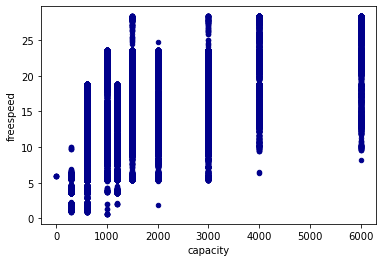

In [8]:
ax = df.plot.scatter(x='capacity',
                    y='freespeed',
                    c='DarkBlue')

In [9]:
ax

### Write output

In [ ]:
gdf_geo.to_file(outputShape)

### Export again from adjusted shapeFile




In [10]:
networkPath = "C:/Users/david/OneDrive/02_Uni/02_Master/05_Masterarbeit/03_MATSim/01_prep/07_Measures/01_street_closure/network_adjusted.xml.gz"
outputShape = "C:/Users/david/OneDrive/02_Uni/02_Master/05_Masterarbeit/03_MATSim/01_prep/07_Measures/01_street_closure/network_adjusted_v2.shp"

In [11]:
net = matsim.read_network(networkPath)

In [12]:
gdf_geo = net.as_geo()

In [13]:
gdf_geo = gdf_geo[~gdf_geo["link_id"].str.startswith("tr")]

In [14]:
gdf_geo.head()

,length,freespeed,capacity,permlanes,oneway,modes,link_id,from_node,to_node,geometry
0,50.53,9.47,1200.0,2.0,1,"car,ride",10000014,1944304351,1856452849,"LINESTRING (477508.123 5466441.289, 477459.281..."
1,43.77,9.48,600.0,1.0,1,"car,ride",120628180,1731805232,1856452849,"LINESTRING (477416.113 5466442.390, 477459.281..."
2,61.02,9.56,1200.0,2.0,1,"car,ride",10000015,1944304351,269775762,"LINESTRING (477508.123 5466441.289, 477557.847..."
3,31.49,5.70,1200.0,2.0,1,"car,ride",69483004,1834445603,269775762,"LINESTRING (477572.063 5466378.392, 477557.847..."
4,41.14,5.71,1200.0,2.0,1,"car,ride",82780285,1944304351,1944304386,"LINESTRING (477508.123 5466441.289, 477542.612..."


In [15]:
gdf_geo[gdf_geo['modes']=='']

,length,freespeed,capacity,permlanes,oneway,modes,link_id,from_node,to_node,geometry


In [16]:
gdf_geo.to_file(outputShape)